## 量子传输和测量模块的展示

在此我们用Qubiter编译/模拟器来展示如何通过一个中间量子比特（比特1）的协助，将一个量子比特（比特0）的纯态传输到另一个量子比特（比特2）。

本文并不旨在讨论或展示量子传输背后的理论。对此感兴趣的读者可以很方便地在网上（维基或者课件）找到对于量子传输的简单推导。以量子传输为例，我们重点展示Qubiter的一些功能，例如测量模块（IF_M blocks）、打印输出，以及量子线路中各种密度矩阵的计算和画图功能。

QUbiter也支持自动生成量子线路的语言文件。感兴趣的读者可以在此找到 <a href="../qubiter_rosetta_stone.pdf"> Qubiter语言文件的详解</a>。


在IBM公司一系列量子计算的展示文档中，也有文档分析了量子态传送的量子传输过程及其量子线路。这些文档是用IBM推出的 qasm 语言组织的，读者可以对qasm语言和Qubiter语言结构进行比较并选用自己喜欢的程序。另外，除了量子编译和量子仿真之外，Qubiter提供了将自身语言转换为IBM qasm语言的子程序，这样通过Qubiter编译后的量子线路可以直接在IBM的量子计算硬件上运行。对其他（例如Rigetti）编译语言和硬件的支持也正在进行中。


首先添加工作目录到系统环境变量：

In [1]:
import os
import sys
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())
sys.path.insert(0,os.getcwd())

导入需要的程序包：

In [2]:
from qubiter.SEO_writer import *
from qubiter.SEO_simulator import *
from qubiter.StateVec import *
from qubiter.Plotter import *
import numpy as np
# np.set_printoptions(precision=5)
import pandas as pan
import seaborn as sea; sea.set()

loaded OneBitGates, WITHOUT autograd.numpy



初始化总量子比特数量 为 3，并且用直接的线路嵌入将3个量子比特映射到同样的3个量子比特。（在此我们用"bit"统称量子比特和经典比特）

In [3]:
num_bits = 3
emb = CktEmbedder(num_bits, num_bits)

指定要写入的文件路径，并且采用（ZL-zero bit last）的惯例，即第0个比特在最后的顺序。

In [4]:
file_prefix = 'teleportation-with-ifs'
wr = SEO_writer(file_prefix, emb)

将量子线路写入为语言文件及图像文件：

In [5]:
# 对第 0 个量子比特旋转任意选取的某个角度，生成初始量子态
wr.write_Rn(0, list(np.pi/180*np.array([20, 68, 46])))
wr.write_PRINT("ALL")

# 对第 1 个量子比特施加Hadamard门 
wr.write_H(1)
# 对第 1、2 个量子比特施加CNOT门，生成bell基 
wr.write_cnot(control_bit=1, target_bit=2)
# wr.write_one_bit_gate(0, OneBitGates.rot_ax, [-np.pi/8, 2])
wr.write_cnot(control_bit=0, target_bit=1)
wr.write_H(0)
wr.write_PRINT("ALL")

# 对量子比特 1、2 做测量
wr.write_MEAS(0, kind=2)
wr.write_MEAS(1, kind=2)

wr.write_PRINT("ALL")
wr.write_IF_M_beg(Controls.new_knob(num_bits, 0, True))
wr.write_Z(2)
wr.write_IF_M_end()
wr.write_PRINT("ALL")
wr.write_IF_M_beg(Controls.new_knob(num_bits, 1, True))
wr.write_X(2)
wr.write_IF_M_end()
wr.write_PRINT("ALL")
    
wr.close_files()

生成的语言文件和图片文件都存储在 io_folder文件夹中：
* <a href="../io_folder/teleportation-with-ifs_3_eng.txt">../io_folder/teleportation-with-ifs_3_eng.txt</a>
* <a href="../io_folder/teleportation-with-ifs_3_ZLpic.txt">../io_folder/teleportation-with-ifs_3_ZLpic.txt</a>

语言文件输出如下：

In [6]:
wr.print_eng_file(jup=True)


输出图片文件，其中每一行都是和语言文件中一一对应的。

这里时间箭头方向为下，由于我们采取了ZL惯例，第0个量子比特在最右边。

另外，在对一个量子比特进行过测量之后（例如第九行），之前的"|"量子演化被":"符号所替代。


In [7]:
wr.print_pic_file(jup=True)

现在我们模拟制备一个初始态，其中所有量子态处于基态|0>，并且让模拟器从初态到末态演化。

其中在量子线路中插入的“打印输出”功能会将在当时的量子线路状态打印输出到屏幕。每个输出指令都有对应的行代码来进行标识。

In [8]:
init_st_vec = StateVec.get_ground_st_vec(num_bits)
sim = SEO_simulator(file_prefix, num_bits, init_st_vec)


*************************beginning PRINT output
PRINT line number=2
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL ( 0.095871 + 0.541881j)	 prob=0.302826
(001)ZL (-0.801041 + 0.235600j)	 prob=0.697174
total probability of state vector (=one if no measurements)= 1.000000
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.302826, 0.697174), 1: (1.0, -0.0), 2: (1.0, -0.0)}
****************************ending PRINT output

*************************beginning PRINT output
PRINT line number=7
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL ( 0.047936 + 0.270940j)	 prob=0.075706
(100)ZL (-0.400520 + 0.117800j)	 prob=0.174294
(010)ZL (-0.400520 + 0.117800j)	 prob=0.174294
(110)ZL ( 0.047936 + 0.270940j)	 prob=0.075706
(001)ZL ( 0.047936 + 0.270940j)	 prob=0.075706
(101)ZL ( 0.400520 - 0.117800j)	 prob=0.174294
(011)ZL ( 0.400520 - 0.117800j)	 prob=0.174294
(111)ZL ( 0.047936 + 0.270940j)	 prob=0.075706
to

所有的量子比特初始态为|0>。

量子线路的第1行对量子比特0做了随意选取角度的旋转。

量子线路的第2行为打印输出操作。

接下来我们将第二行的量子态存储为密度矩阵den_mat1，并且用Pandas数据库存储和展示这个密度矩阵。其中量子基矢仍然采用ZL(第0在最后)的惯例。



In [9]:
# density  matrix cached at line number 2 of eng & pic files
den_mat1 = StateVec.get_den_mat(num_bits, sim.cached_sts[2])
den_mat1_df = Plotter.get_den_mat_df(num_bits, den_mat1)
# pan.set_option('precision', 5)
# print("\nden_mat1=\n", den_mat1_df)
den_mat1_df.style.format("{:.4}")

之后，我们将模拟器演变的末态存储为密度矩阵den_mat2，并且用pandas数据结构存储和展示：

In [10]:
den_mat2 = StateVec.get_den_mat(num_bits, sim.cur_st_vec_dict)
den_mat2_df = Plotter.get_den_mat_df(num_bits, den_mat2)
# print("\nden_mat2=\n", den_mat2_df)
den_mat2_df.style.format("{:.3}")

更直观的，密度矩阵也可以通过quiver画图被表示为向量箭头的形式。

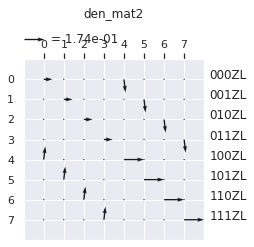

In [11]:
Plotter.plot_phasors(['den_mat2'], den_mat_df_list=[den_mat2_df])

接下来将密度矩阵den_mat2中的值替换为模，并且将数据输出：


In [12]:
df = den_mat2_df.apply(lambda x : np.sqrt((x*np.conj(x)).to_numpy().real))
df

000ZL     001ZL     010ZL     011ZL     100ZL     101ZL     110ZL  \
000ZL  0.075706  0.000000  0.000000  0.000000  0.114870  0.000000  0.000000   
001ZL  0.000000  0.075706  0.000000  0.000000  0.000000  0.114870  0.000000   
010ZL  0.000000  0.000000  0.075706  0.000000  0.000000  0.000000  0.114870   
011ZL  0.000000  0.000000  0.000000  0.075706  0.000000  0.000000  0.000000   
100ZL  0.114870  0.000000  0.000000  0.000000  0.174294  0.000000  0.000000   
101ZL  0.000000  0.114870  0.000000  0.000000  0.000000  0.174294  0.000000   
110ZL  0.000000  0.000000  0.114870  0.000000  0.000000  0.000000  0.174294   
111ZL  0.000000  0.000000  0.000000  0.114870  0.000000  0.000000  0.000000   

          111ZL  
000ZL  0.000000  
001ZL  0.000000  
010ZL  0.000000  
011ZL  0.114870  
100ZL  0.000000  
101ZL  0.000000  
110ZL  0.000000  
111ZL  0.174294

此数据全部由非零的数据构成，所以可以通过seaborn工具包用heatmap表示：

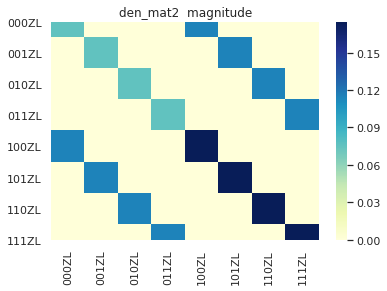

In [13]:
plt.close('all')
ax = sea.heatmap(df, cmap="YlGnBu")
ax.set_title('den_mat2  magnitude')
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()

密度矩阵$\rho$的非纯度由$ abs({\rm tr}(\rho^2) - 1 )$ 定义。当密度矩阵$\rho$为纯态时此值为零。而目前模拟器的末态den_mat2并非一个纯态。


In [14]:
print("impurity of den_mat2=", StateVec.get_impurity(den_mat2))

impurity of den_mat2= 0.75


下一步我们对密度矩阵关于比特0和1求迹，并得到约化密度矩阵tr01_den_mat2.此约化密度矩阵也可以通过dataframe展示出来。可以看到，初始的量子比特0的密度矩阵den_mat1已经被成功的转移到量子比特2的密度矩阵tr01_den_mat2，意味着量子态成功的从比特0传输到比特2.

In [15]:
tr01_den_mat2 = StateVec.get_partial_tr(num_bits, den_mat2, {0, 1})
tr01_den_mat2_df = Plotter.get_den_mat_df(1, tr01_den_mat2)
# print("\ntr01_den_mat2=\n", tr01_den_mat2_df)
tr01_den_mat2_df.style.format("{:.4}")

可以验证，密度矩阵tr01_den_mat2 描述一个和初始态同样的纯态。其非纯度为0：

In [16]:
print("impurity of tr01_den_mat2=", StateVec.get_impurity(tr01_den_mat2))

impurity of tr01_den_mat2= 2.220446049250313e-16
